# Heart Disease in Patients

Syed Zain Ali, Eric Hou

## Introduction

### Background Information
Heart disease encompasses various conditions affecting the heart, including coronary heart disease and cardiomyopathy. It is a widespread health issue globally, claiming an estimated 17.9 million lives annually, with one-third of these deaths occurring prematurely in individuals under 70 years of age. Factors such as high blood pressure and elevated cholesterol levels are associated with an increased risk of heart disease.

Early identification of heart disease in patients is crucial. Therefore, this project aims to evaluate the effectiveness of predicting a patient's likelihood of having heart disease based on two primary factors: ST depression induced by exercise relative to rest and maximum heart rate. The central question addressed is: How accurately can the presence of heart disease be predicted in patients through the classification of these key factors?

For exploratory data analysis (EDA), scatterplots were generated for each possible pair of numeric variables. Upon comparing these plots, a correlation was observed between the presence of heart disease, low ST depression, and high maximum heart rate. Consequently, these two variables were selected for further analysis. Classification was chosen as the algorithm for prediction, as it aims to predict the categorical class label (healthy or presence of heart disease) based on the selected variables. While exploring additional risk factors such as sex and age would have been desirable with more time and resources, the project focused on a select set of variables to maintain manageability.

- The presence of heart disease appears to be correlated with low ST depression and high maximum heart rate.
- Classification was selected as the algorithm for prediction, aiming to predict the categorical class label (healthy or presence of heart disease) based on the selected variables.


The column names for the dataset are as follows: 

1. **age** - Patient's age
2. **sex** - Patient's sex
3. **chest_pain** - Chest pain type
4. **rest_bp** - Resting blood pressure
5. **cholesterol** - Serum cholesterol level (mg/dl)
6. **fasting_blood_sugar** - Fasting blood sugar > 120mg/dl (true/false)
7. **rest_ecg** - Resting electrocardiographic results
8. **max_hr** - Maximum heart rate
9. **exercise_angina** - Exercise induced angina (yes/no)
10. **st_depression** - ST Depression induced by exercise relative to rest levels
11. **slope_st_segment** - Slope of the peak exercise ST segment
12. **num_vessels** - Number of major vessels colored by flourosopy
13. **thalassemia** - Presence of thalassemia ('fixed', 'reversible', 'normal')
14. **diagnosis** - Diagnosis of heart disease ('healthy'/'sick')



In [88]:
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
# install.packages("kknn")
library(kknn)
options(repr.matrix.max.rows = 8)

https://archive.ics.uci.edu/dataset/45/heart+disease

## Methods and Results

As stated in `worksheet_classification2.ipynb`, it is essential to call `set.seed` only once at the start of the analysis. This ensures that our random numbers are sufficiently random and that our code remains reproducible.


In [89]:
set.seed(9999)

### Reading the data set from the web into R ###

To read a CSV file containing the data from `processed.cleveland.data`, along with a row of column names (which correspond to the column names listed in `cleve.mod` under "Original atts" without the bracketed content):

In [90]:
col_names <- c("age",  
                "sex",
                "chest_pain",    
                "rest_bp",
                "cholestrol",
                "fasting_blood_sugar",
                "rest_ecg",
                "max_hr",
                "exercise_angina",
                "st_depression",
                "slope_st_segment",
                "num_vessels",
                "thalassemia",
                "diagnosis")

In [91]:
options(repr.matrix.max.rows = 25)

cleveland_data <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"), 
                                delim = ",", col_names = col_names) |>
                                mutate_all(as.numeric)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): num_vessels, thalassemia
dbl (12): age, sex, chest_pain, rest_bp, cholestrol, fasting_blood_sugar, re...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `num_vessels = .Primitive("as.double")(num_vessels)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


reading the data in `processed.switzerland.data`:

In [92]:
switzerland_data <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"), 
                                   delim = ",", col_names = col_names) |>
                                   mutate_all(as.numeric)

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): rest_bp, fasting_blood_sugar, rest_ecg, max_hr, exercise_angina, st...
dbl (5): age, sex, chest_pain, cholestrol, diagnosis

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `rest_bp = .Primitive("as.double")(rest_bp)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”


reading the data in `processed.va.data`:

In [93]:
virginia_data <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"), 
                                   delim = ",", col_names = col_names) |>
                                   mutate_all(as.numeric)

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): rest_bp, cholestrol, fasting_blood_sugar, max_hr, exercise_angina, ...
dbl (5): age, sex, chest_pain, rest_ecg, diagnosis

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `rest_bp = .Primitive("as.double")(rest_bp)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”


reading the data in `processed.hungarian.data`:

In [94]:
reprocessed_hungarian_data <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"), 
                                    delim = " ", col_names = col_names) |>
                                    mutate_all(as.numeric)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): age, sex, chest_pain, rest_bp, cholestrol, fasting_blood_sugar, re...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


To reference information when justifying some of the decisions made regarding data tidying, we need to read the file named `heart-disease.names`.


In [95]:
heart_disease_names <- read_file(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names"))

Combining `cleveland_dataset_web`, `switzerland_dataset_web`, `virginia_dataset_web`, and `reprocessed_hungarian_dataset_web`.


In [96]:
global_data <- bind_rows(cleveland_data, switzerland_data, virginia_data, reprocessed_hungarian_data)
head(global_data, 25)

age,sex,chest_pain,rest_bp,cholestrol,fasting_blood_sugar,rest_ecg,max_hr,exercise_angina,st_depression,slope_st_segment,num_vessels,thalassemia,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


**Table 1**. The first 25 rows of our dataset 

Looking at `Table 1`, it's worth noting the presence of numerous -9's. Additionally, there's a discernible hierarchy among the numeric variables concerning their range of values. Specifically, `cholestrol` exhibits the widest range of values, while `st_depression` has the narrowest range. Despite all variables being of type `double`, it's apparent that many are actually categorical. We elaborate on how we differentiated between numeric and categorical variables later in this report.

Here, we convert the value -9 to NA, as indicated by this excerpt from the file named heart-disease.names: 
>"Missing Attribute Values: Several. Distinguished with value -9.0."


In [97]:
na_matrix <- global_data == "-9"

is.na(global_data) <- na_matrix

### Cleaning and wrangling the data into a tidy format

We now attempt to create a table reporting:

- Counts for healthy and sick observations
- Counts of rows with missing values for healthy and sick observations
- Averages of variables that we consider candidates for predictors.


The description of the `num` attribute in `heart-disease.names` doesn't align with the possible values found in any of the four data files used in our analysis. Here are the discrepancies:

a) In the "7. Attribute Information" subsection of `heart-disease.names`, it states that `num` can either be 0 or 1. However, values of `num` in the range 0:4 are present within the first 25 rows of `global_data`.

b) Additionally, under the same subsection, it's stated that 0 indicates < 50% diameter narrowing, while 1 indicates > 50% diameter narrowing. This contradicts the description of `num` under the "4. Relevant Information" subsection, which specifies that "Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)".

As a result, we strongly believe that 0 does not indicate < 50% diameter narrowing, and 1 does not indicate > 50% diameter narrowing. Our stance on this matter is supported by the author of another paper referencing the same dataset. In the "4. Hybrid Rule Sets Model" section, the author stipulated that when their proposed model learns from "a heart disease dataset from the UCI ML repository", a value of 1 assigned to the Y variable conveys that "the patient has heart disease" (Wang, 2018). Furthermore, in another paper demonstrating the computation of metrics for quantifying the quality of biomedical data on the same heart disease dataset, the authors noted that "studies with the Heart Disease dataset generally group positive values into a single positive class" (Silvestre et al., 2014).

Based on this understanding, we proceed with our analysis, considering value 0 to indicate the absence of heart disease, while values 1, 2, 3, 4 indicate its presence.


In [98]:
global_data <- as_tibble(global_data)

In [99]:
global_data |>
    mutate(diagnosis = as.factor(diagnosis)) |>
    mutate(diagnosis = fct_recode(diagnosis, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>
    mutate(row_contains_na = (is.na(age) | is.na(sex) | is.na(chest_pain) | is.na(rest_bp) | is.na(cholestrol) | is.na(fasting_blood_sugar) | is.na(rest_ecg) | is.na(max_hr) | is.na(exercise_angina) | is.na(st_depression) | is.na(slope_st_segment) | is.na(num_vessels) | is.na(thalassemia))) |>
    group_by(diagnosis) |>
    summarize(
        count = n(), 
        num_rows_with_na = sum(row_contains_na),
        percentage = count / nrow(global_data) * 100,
        average_age = mean(age, na.rm = TRUE),
        avg_resting_bp = mean(rest_bp, na.rm = TRUE),
        avg_cholestorol = mean(cholestrol, na.rm = TRUE),
        avg_max_hr = mean(rest_bp, na.rm = TRUE),
        avg_oldpeak = mean(st_depression, na.rm = TRUE)
        )
    

diagnosis,count,num_rows_with_na,percentage,average_age,avg_resting_bp,avg_cholestorol,avg_max_hr,avg_oldpeak
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
healthy,411,251,44.67391,50.54745,129.9130,227.9056,129.9130,0.4182051
sick,509,370,55.32609,55.90373,133.9787,176.4799,133.9787,1.2626068


**Table 2.** Summary tibble with the number of rows containing NA values. Note that only columns for the averages of numerical variables' values are included, as it doesn't make sense to compute the averages of categorical variables' values.


As suggested by `Table 2`, approximately 45% of the observations classified as `healthy` have missing values. Conversely, around 55% of the observations classified as `sick` have missing values. This implies that when we clean our data, we will need to address the frequent absence of values.

In [100]:
global_data |>
        pivot_longer(cols = c(age, sex, chest_pain, rest_bp, cholestrol, fasting_blood_sugar, rest_ecg, max_hr, exercise_angina, st_depression, slope_st_segment, num_vessels, thalassemia)) |>
        mutate(diagnosis = as.factor(diagnosis)) |>
        mutate(diagnosis = fct_recode(diagnosis, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>
        group_by(diagnosis, name) |>
        summarize(
            missing_values_count = sum(is.na(value))
        ) |> 
        group_by(diagnosis) |>
        summarize(na_count = sum(missing_values_count > 0))

`summarise()` has grouped output by 'diagnosis'. You can override using the
`.groups` argument.


diagnosis,na_count
<fct>,<int>
healthy,9
sick,10


**Table 3.** Summary tibble with number of columns containing NA values.

`Table 3` indicates that the set of all healthy observations have missing values in 9 out of 13 columns, each corresponding to a variable in the dataset except for the Class. Similarly, the table shows that the set of all sick observations have missing values in 10 out of 13 columns. We've already determined that we need to address the issue of missing values, and this finding will influence our approach to handling them.


#### Justification for the datasets we chose to use: ####

After reviewing lines 109 - 124 of **heart-disease.names**, it became evident that despite the collection of data on numerous heart disease diagnoses with 76 attributes, only 14 attributes were utilized in experiments related to heart diseases. Given that our project aims to predict whether an observed individual may or may not have heart disease, we opted to select datasets containing only these 14 attributes as used by researchers.

Consequently, our choices for data files were narrowed down to:
- processed.cleveland.data
- data.csv
- processed.hungarian.data
- processed.switzerland.data
- processed.va.data
- reprocessed.hungarian.data

Choosing between processed.cleveland.data and data.csv:
- We noticed that data.csv contained the same information as processed.cleveland.data but also included the names of the 14 attributes in the correct order. We decided to define the column names using a list. Therefore, we opted for processed.cleveland.data over data.csv.

Choosing between processed.hungarian.data and reprocessed.hungarian.data:
- Both files were identical except for the representation of missing values, with processed.hungarian.data using "?".
- Consequently, we chose reprocessed.hungarian.data over processed.hungarian.data.


Since a significant portion of rows in both the dataset associated with healthy and sick observations have NA values, we've decided to impute the missing entries of each row in the dataset. Additionally, we had to drop all categorical variables, including Sex, Chest Pain Type (chest_pain), Fasting Blood Sugar over 120 mg/dl (fasting_blood_sugar), Resting ECG Results (rest_ecg), Exercise Induced Angina (exercise_angina), Slope of the Peak Exercise ST Segment (slope_st_segment), and Thalassemia Type (thalassemia) because we're performing a classification.

Create a tidymodels recipe for standardizing our predictors and handling missing values:

In [101]:
impute_recipe <- recipe(diagnosis ~ age + rest_bp + cholestrol + max_hr + st_depression, data = global_data) |>
                        step_impute_mean(all_predictors()) |>
                        step_center(all_predictors()) |>
                        step_scale(all_predictors())

Before we proceed with our Exploratory Data Analysis, we'll inspect the output of our recipe.

In [102]:
imputed_scaled_global_data <- impute_recipe |>  
                            prep() |> 
                            bake(global_data)
imputed_scaled_global_data

head(imputed_scaled_global_data, 10)

age,rest_bp,cholestrol,max_hr,st_depression,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.00683792,0.6976615,0.31085168,0.4954288,1.34868785,0
1.43125528,1.5109388,0.79727927,-1.1753156,0.58951174,2
1.43125528,-0.6578005,0.27414016,-0.3399434,1.63337888,1
-1.75187491,-0.1156157,0.46687562,1.9672751,2.48745200,0
-1.32745755,-0.1156157,0.04469318,1.3705807,0.49461473,0
0.26410754,-0.6578005,0.33838531,1.6092585,-0.07476734,0
0.90073358,0.4265691,0.63207745,0.8932251,2.58234901,3
0.37021188,-0.6578005,1.42137506,1.0125640,-0.26456137,0
1.00683792,-0.1156157,0.50358714,0.3760900,0.49461473,2


age,rest_bp,cholestrol,max_hr,st_depression,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.00683792,0.6976615,0.31085168,0.4954288,1.34868785,0
1.43125528,1.5109388,0.79727927,-1.1753156,0.58951174,2
1.43125528,-0.6578005,0.27414016,-0.3399434,1.63337888,1
-1.75187491,-0.1156157,0.46687562,1.9672751,2.48745200,0
-1.32745755,-0.1156157,0.04469318,1.3705807,0.49461473,0
0.26410754,-0.6578005,0.33838531,1.6092585,-0.07476734,0
0.90073358,0.4265691,0.63207745,0.8932251,2.58234901,3
0.37021188,-0.6578005,1.42137506,1.0125640,-0.26456137,0
1.00683792,-0.1156157,0.50358714,0.3760900,0.49461473,2


**Table 4.** A snippet of the output of a recipe containing potential predictor variables along with the Class variable.

#### 2) Visualizing the data with a plot pertinent to the analysis we will conduct, using only training data:

In [103]:
imputed_scaled_global_data <- imputed_scaled_global_data |>
      mutate(diagnosis = as.factor(diagnosis)) |>
      mutate(diagnosis = fct_recode(diagnosis, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4"))

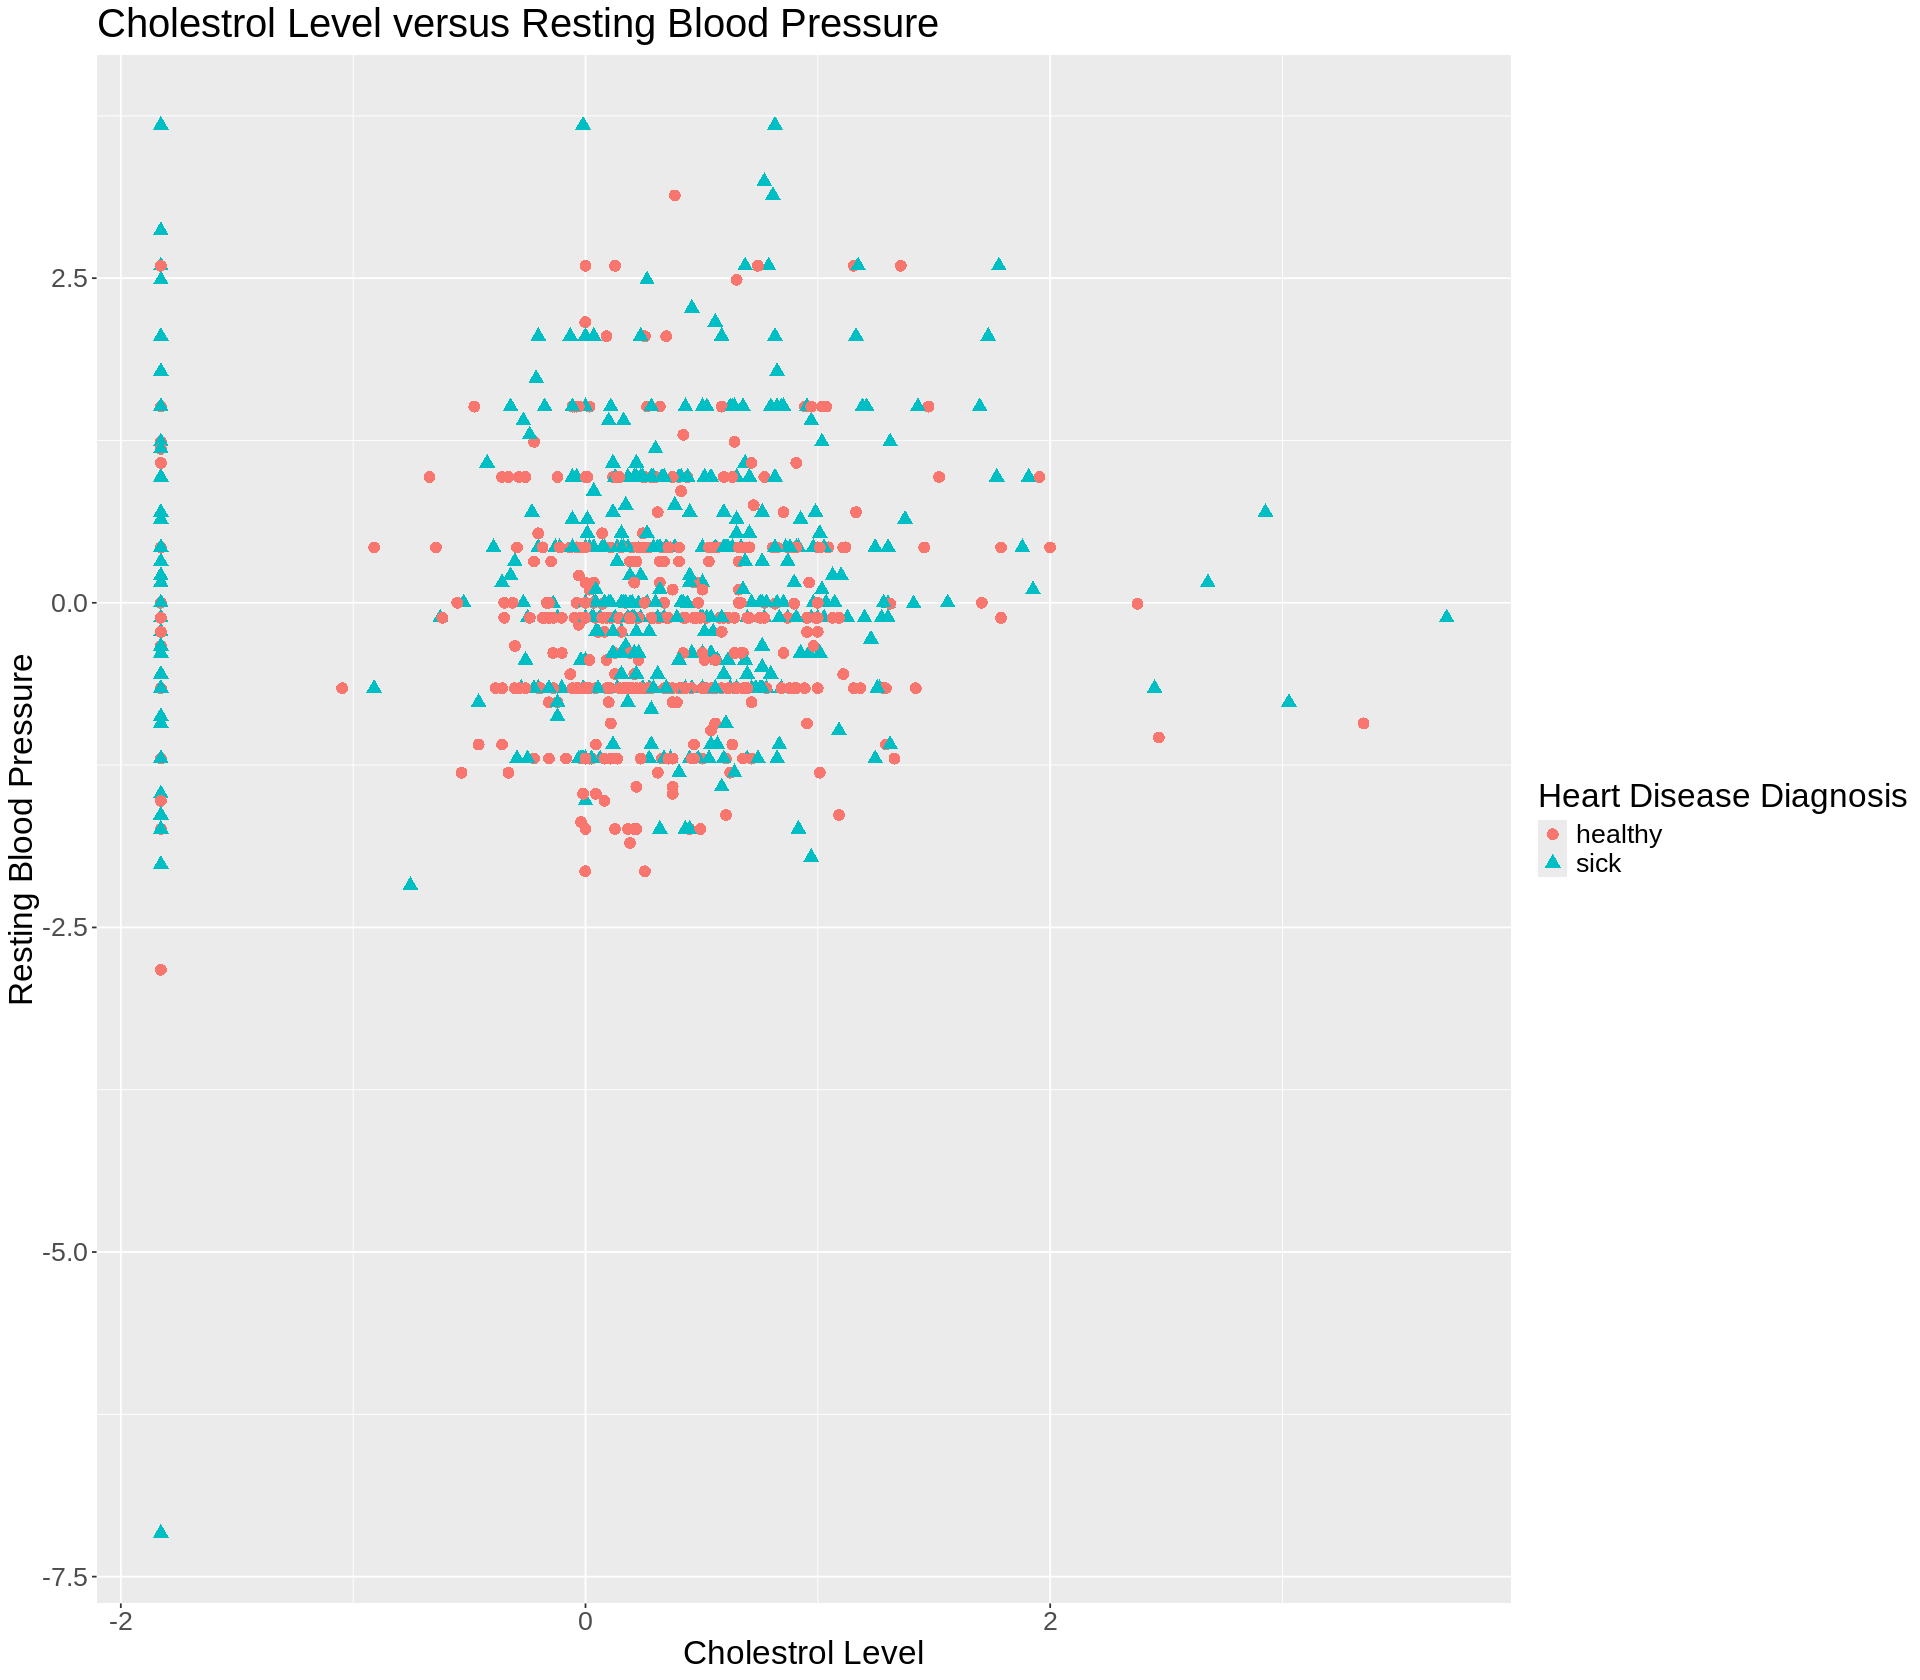

In [104]:
options(repr.plot.width = 16, repr.plot.height = 14) 

mhr_oldpeak <- imputed_scaled_global_data |> 
    ggplot(aes(x = cholestrol, y = rest_bp)) + 
    geom_point(aes(colour = diagnosis, shape = diagnosis), size = 3) + 
    labs(title = "Cholestrol Level versus Resting Blood Pressure", x = "Cholestrol Level", y = "Resting Blood Pressure", colour = "Heart Disease Diagnosis", shape = "Heart Disease Diagnosis") + 
    theme(text = element_text(size = 20))
mhr_oldpeak

**Figure 1.** A scatterplot illustrating the relationship between the predictor `rest_bp` and the predictor `max_hr`.


Before commencing the classification process, we'll duplicate `global_data` and label it `heart_data`. This approach ensures code conciseness. Subsequently, we'll cleanse `heart_data` to match the columns and rows of `imputed_scaled_global_data`.

In [105]:
heart_data <- global_data

heart_data <- heart_data |>
      select(diagnosis, age, rest_bp, cholestrol, max_hr, st_depression)

heart_data <- heart_data |>
      mutate(diagnosis = as.factor(diagnosis)) |>
      mutate(diagnosis = fct_recode(diagnosis, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4"))

Now, we will start the classification process.

We'll split `heart_data` into training (70%) and testing (30%) sets using the `initial_split` function. The variable `diagnosis` will serve as our class label, and we'll name the resulting object `heart_split`.

Subsequently, we'll use the `heart_split` object in the training and testing functions, naming the respective objects `heart_train` and `heart_test`.


In [106]:
heart_split <- initial_split(heart_data, prop = 0.7, strata = diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

Creating a tidymodels recipe to standardize our predictors and impute their missing entries for the variables `max_hr` and `st_depression`:


In [107]:
heart_recipe <- recipe(diagnosis ~ max_hr + rest_bp , data = heart_train) |>
                step_impute_mean(all_predictors()) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

imputed_scaled_heart_training <- heart_recipe |>
               prep() |>
               bake(heart_train)

imputed_scaled_heart_training

max_hr,rest_bp,diagnosis
<dbl>,<dbl>,<fct>
0.49865250,0.73874599,healthy
2.00560124,-0.08701906,healthy
1.39467607,-0.08701906,healthy
1.02812097,-0.63752909,healthy
0.62083753,0.46349097,healthy
1.43540442,-0.63752909,healthy
0.98739263,2.22512307,healthy
0.90593594,0.46349097,healthy
0.05064071,-0.08701906,healthy


**Table 5.** An part of the output of a recipe including candidate predictor variables and the diagnosis variable.


Note that in `Table 5`, our training set comprises only 3 variables, with 2 serving as predictors and the remaining variable being the `diagnosis` variable (i.e., the class label).


Creating a model specification for K-nearest neighbors classification with k = 5 using the `nearest_neighbor()` function.

In [108]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")

Combining `heart_recipe` with `knn_spec` in a workflow, and fitting it to the training set:

In [109]:
heart_fit <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec) |>
            fit(data = heart_train)

Now that we've created our K-nearest neighbor classifier object, we can predict the class labels for our test set.

First, we pass our fitted model and the test dataset to the predict function.
Then, we use the `bind_cols` function to append the column of predictions to the original test data:


In [110]:
heart_test_predictions <- predict(heart_fit , heart_test) |>
                          bind_cols(heart_test)
                          
head(heart_test_predictions, 10)

.pred_class,diagnosis,age,rest_bp,cholestrol,max_hr,st_depression
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sick,sick,67,160,286,108,1.5
healthy,sick,67,120,229,129,2.6
healthy,healthy,56,120,236,178,0.8
healthy,healthy,57,140,192,148,0.4
healthy,healthy,57,150,168,174,1.6
sick,healthy,49,130,266,171,0.6
sick,sick,60,130,206,132,2.4
healthy,healthy,50,120,219,158,1.6
sick,healthy,66,150,226,114,2.6


**Table 6.** A table displaying a snippet of our model's predictions for the class labels alongside the corresponding observations in the testing set that the model attempted to predict.

We then use the metrics function to get statistics about the quality of our model:

In [111]:
heart_model_metrics <- heart_test_predictions |> 
        metrics(truth = diagnosis, estimate = .pred_class) |>
        head(1)
heart_model_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6101083
